# Implications of Artificial Intelligence (AI) on Climate Change

Elissa Leung, Yangjee Sherpa and Dani Servius

Data Sources:
* https://ourworldindata.org/grapher/private-investment-in-artificial-intelligence-cset 
* https://ourworldindata.org/grapher/per-capita-consumption-based-co-emissions-vs-per-capita-energy-consumption
* https://ourworldindata.org/grapher/per-capita-energy-source-stacked 
* http://datahub.io/core/global-temp
* https://public.emdat.be/data 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
import plotly.graph_objects as go
from pickle import TRUE
import seaborn as sns

In [5]:
def human_format(num, pos):
    if num >= 1_000_000_000:
        return f'{num/1_000_000_000:}B'  # Convert to billions
    elif num >= 1_000_000:
        return f'{num/1_000_000:.0f}M'  # Convert to millions
    else:
        return f'{num:.0f}'

## AI Private Investments

In [7]:
ai_private_investment_original = pd.read_csv("https://ourworldindata.org/grapher/private-investment-in-artificial-intelligence-cset.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
ai_private_investment = ai_private_investment_original.dropna(subset = ["Code"])

In [8]:
# Total unique countries represented in AI dataset
len(ai_private_investment["Entity"].unique())

115

In [9]:
ai_private_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Entity                           825 non-null    object
 1   Code                             825 non-null    object
 2   Year                             825 non-null    int64 
 3   investment_estimated__field_all  825 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.9+ KB


In [10]:
df_investments = ai_private_investment.drop(columns=["Code"])
df_investments = df_investments[df_investments["Entity"]!= 'World']
df_investments.rename(columns={"investment_estimated__field_all": "Estimated Investment"}, inplace=True)

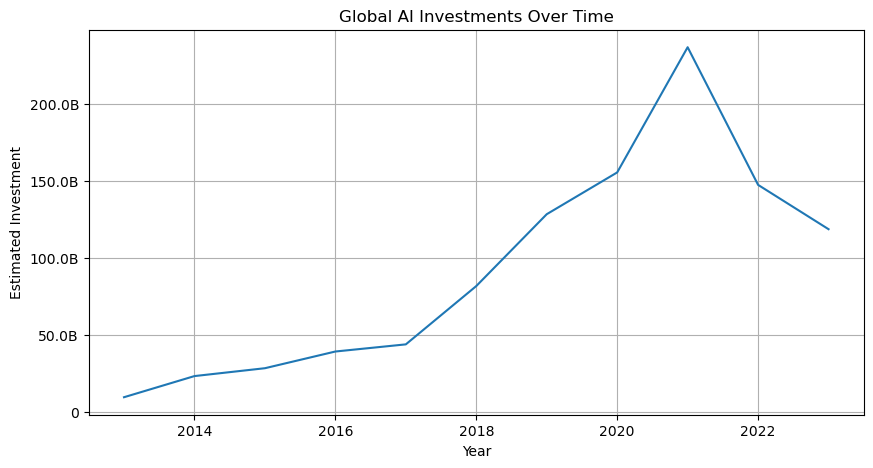

In [11]:
ai_private_investment_world = ai_private_investment[ai_private_investment["Entity"] == "World"]
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(ai_private_investment_world["Year"], ai_private_investment_world["investment_estimated__field_all"])

ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_format))

ax.set_xlabel("Year")  
ax.set_ylabel("Estimated Investment")  
ax.set_title("Global AI Investments Over Time")  
plt.grid(True)

# plt.savefig("global_ai_investment.png")

plt.show()

In [12]:
df_investments_edited = df_investments.set_index("Entity")
df_investments_grouped = df_investments_edited.groupby(["Entity", "Year"]).sum()

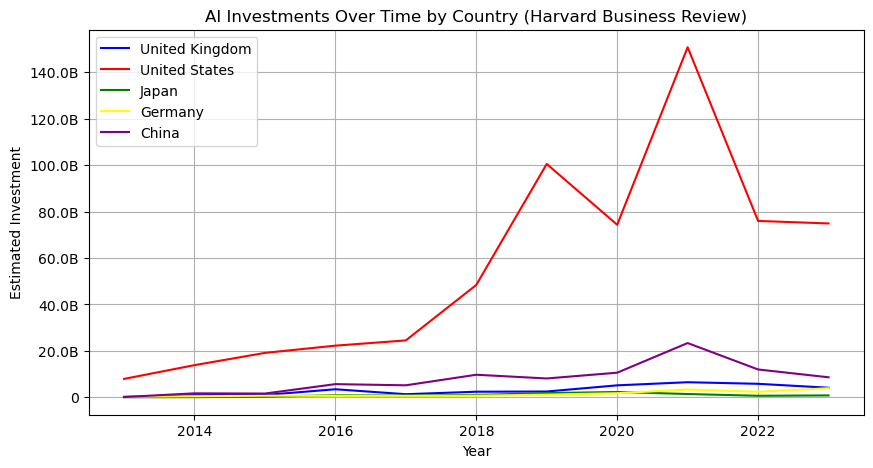

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_investments_grouped.loc["United Kingdom"].index, df_investments_grouped.loc["United Kingdom"]["Estimated Investment"], label="United Kingdom", color="blue")
ax.plot(df_investments_grouped.loc["United States"].index, df_investments_grouped.loc["United States"]["Estimated Investment"], label="United States", color="red")
ax.plot(df_investments_grouped.loc["Japan"].index, df_investments_grouped.loc["Japan"]["Estimated Investment"], label="Japan", color="green")
ax.plot(df_investments_grouped.loc["Germany"].index, df_investments_grouped.loc["Germany"]["Estimated Investment"], label="Germany", color="yellow")
ax.plot(df_investments_grouped.loc["China"].index, df_investments_grouped.loc["China"]["Estimated Investment"], label="China", color="purple")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_format))

ax.set_xlabel("Year")  
ax.set_ylabel("Estimated Investment")  
ax.set_title("AI Investments Over Time by Country (Harvard Business Review)")  
ax.legend()
plt.grid(True)

plt.show()

In [14]:
df_invest_grouped = df_investments_edited.groupby(["Entity", "Year"]).sum()
df_invest_grouped = df_investments_edited.groupby("Entity")["Estimated Investment"].sum()
df_sorted_inv = df_invest_grouped.sort_values(ascending=False)
df_sorted_inv.head()

Entity
United States     612720779220
China              86847195957
India              57639152594
United Kingdom     33559087358
Canada             32097667970
Name: Estimated Investment, dtype: int64

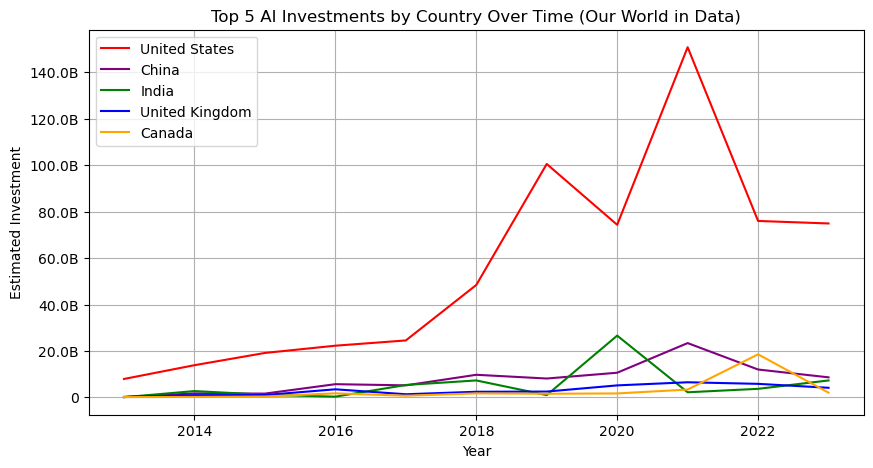

In [15]:
# plotted the top 5 coutries, that was taken from calculating the total investment from 2013 - 2023
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_investments_grouped.loc["United States"].index, df_investments_grouped.loc["United States"]["Estimated Investment"], label="United States", color="red")
ax.plot(df_investments_grouped.loc["China"].index, df_investments_grouped.loc["China"]["Estimated Investment"], label="China", color="purple")
ax.plot(df_investments_grouped.loc["India"].index, df_investments_grouped.loc["India"]["Estimated Investment"], label="India", color="green")
ax.plot(df_investments_grouped.loc["United Kingdom"].index, df_investments_grouped.loc["United Kingdom"]["Estimated Investment"], label="United Kingdom", color="blue")
ax.plot(df_investments_grouped.loc["Canada"].index, df_investments_grouped.loc["Canada"]["Estimated Investment"], label="Canada", color="orange")

ax.yaxis.set_major_formatter(mticker.FuncFormatter(human_format))

ax.set_xlabel("Year")  
ax.set_ylabel("Estimated Investment") 
ax.set_title("Top 5 AI Investments by Country Over Time (Our World in Data)")  
ax.legend()
plt.grid(True)

# plt.savefig("AI_investments.png")

plt.show()

### Total AI investment by Year

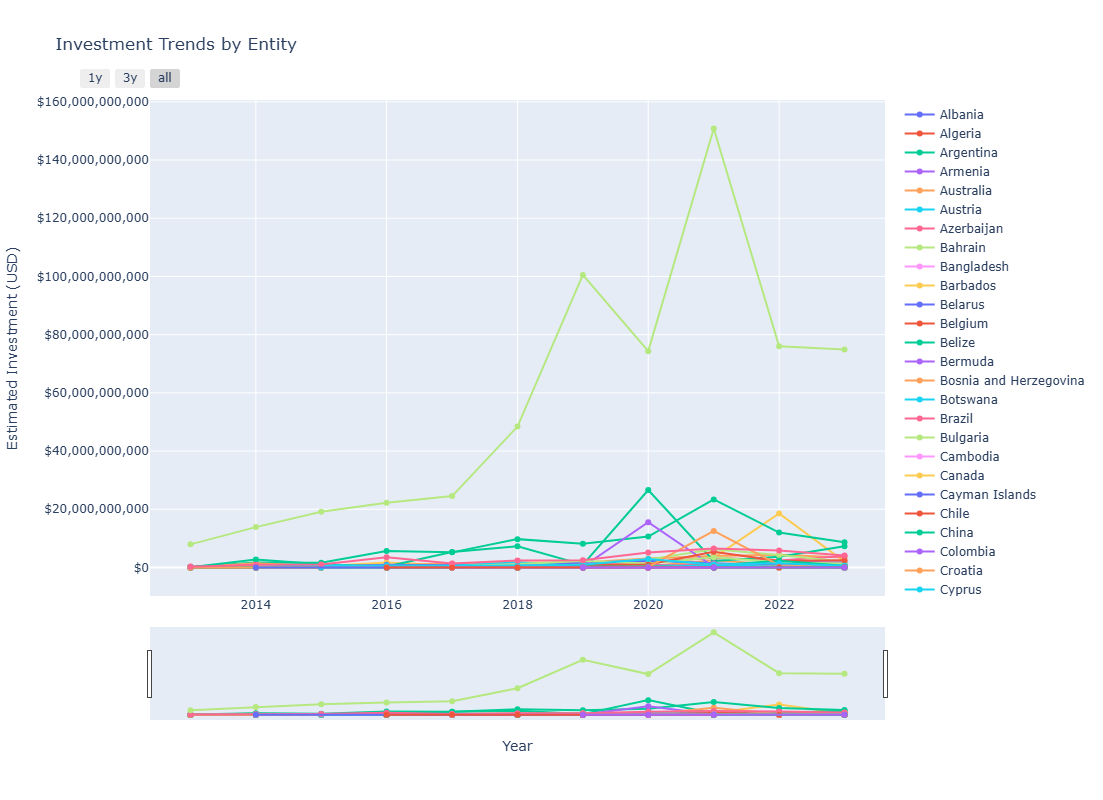

In [135]:
fig = go.Figure()


for entity in df_investments["Entity"].unique():
    df_entity = df_investments[df_investments["Entity"] == entity]
    fig.add_trace(go.Scatter(
        x=df_entity["Year"], 
        y=df_entity["Estimated Investment"], 
        mode="lines+markers",
        name=entity,
    ))


fig.update_layout(
    title="Investment Trends by Entity"
)


fig.update_layout(
    xaxis=dict(
        title="Year",
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=3, label="3y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    yaxis=dict(title="Estimated Investment (USD)", tickformat="$,.0f"),
    height = 800, 
    width = 1100
)

# fig.write_html("ai_investment.html", full_html = True)

fig.show()

## Energy Consumption per Capita and Carbon Emissions per Capita

In [19]:
energy_emissions_df = pd.read_csv("https://ourworldindata.org/grapher/per-capita-consumption-based-co-emissions-vs-per-capita-energy-consumption.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
energy_emissions_df.dropna(subset = ["Code"], inplace = True)

In [20]:
energy_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55386 entries, 0 to 60257
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      55386 non-null  object 
 1   Code                                        55386 non-null  object 
 2   Year                                        55386 non-null  int64  
 3   emissions_total_per_capita                  22895 non-null  float64
 4   primary_energy_consumption_per_capita__kwh  10062 non-null  float64
 5   population_historical                       55366 non-null  float64
 6   owid_region                                 257 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.4+ MB


In [21]:
energy_emissions_df["Entity"].unique()

array(['Afghanistan', 'Akrotiri and Dhekelia', 'Aland Islands', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Austria-Hungary', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Indian Ocean Territory',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Christmas Island', 'Cocos Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Czechoslovakia', 'Democratic Republic of Congo', 'D

In [22]:
# Total unique countries represented in energy/carbon dataset
len(energy_emissions_df["Entity"].unique())

260

In [23]:
energy_emissions_df_2023 = energy_emissions_df[energy_emissions_df["Year"] == 2023]
countries_with_regions = energy_emissions_df_2023[["Entity", "Code", "owid_region"]].dropna(subset = ["owid_region"])

countries_with_regions.head()

,Entity,Code,owid_region
74,Afghanistan,AFG,Asia
603,Aland Islands,ALA,Europe
694,Albania,ALB,Europe
972,Algeria,DZA,Africa
1241,American Samoa,ASM,Oceania


In [24]:
energy_emissions_df_with_regions = pd.merge(energy_emissions_df, countries_with_regions, how = "left", left_on = ["Entity", "Code"], right_on = ["Entity", "Code"])
energy_emissions_df_with_regions.rename(columns = {"owid_region_y" : "Continent"}, inplace = True)
energy_emissions_df_with_regions.drop(["owid_region_x"], axis = 1, inplace = True)
energy_emissions_df_with_regions.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,Continent
0,Afghanistan,AFG,1949,0.001992,NaN,7356890.0,Asia
1,Afghanistan,AFG,1950,0.010837,NaN,7776182.0,Asia
2,Afghanistan,AFG,1951,0.011625,NaN,7879343.0,Asia
3,Afghanistan,AFG,1952,0.011468,NaN,7987783.0,Asia
4,Afghanistan,AFG,1953,0.013123,NaN,8096703.0,Asia


In [25]:
investment_energy_df = pd.merge(ai_private_investment, energy_emissions_df_with_regions, how = "left", right_on = ["Entity", "Code", "Year"], left_on = ["Entity", "Code", "Year"])

In [26]:
investment_energy_df.head()

,Entity,Code,Year,investment_estimated__field_all,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,Continent
0,Albania,ALB,2014,4578426,2.066174,11809.461,2903748.0,Europe
1,Albania,ALB,2016,2258014,1.598409,13823.748,2897868.0,Europe
2,Albania,ALB,2019,7419258,1.673111,11585.555,2885012.0,Europe
3,Albania,ALB,2020,4187914,1.640399,11158.003,2871951.0,Europe
4,Algeria,DZA,2021,0,4.012330,16017.653,44761101.0,Africa


In [27]:
investment_energy_df.sort_values(["Year"], inplace = True)
investment_energy_df_plot = investment_energy_df.rename(columns = {"investment_estimated__field_all" : "AI Private Investment",
                                                 "primary_energy_consumption_per_capita__kwh" : "Energy Consumption per Capita (kwh)",
                                                 "emissions_total_per_capita" : "CO2 Emissions per Capita"})


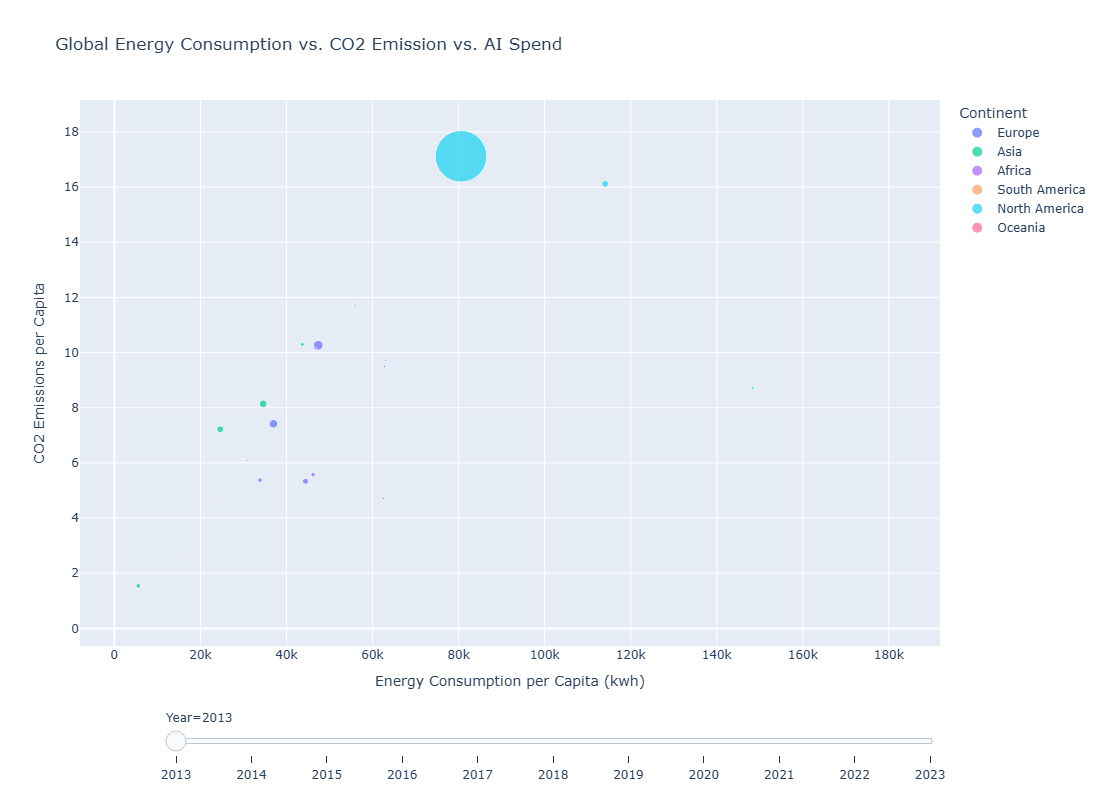

In [137]:
fig = px.scatter(investment_energy_df_plot, x="Energy Consumption per Capita (kwh)", y="CO2 Emissions per Capita", 
                 animation_frame="Year", animation_group="Entity", title = "Global Energy Consumption vs. CO2 Emission vs. AI Spend",
                 size="AI Private Investment", color="Continent", hover_name="Entity",
                 size_max=200, height = 800, width = 1100)

fig.update_traces(textposition='top center')

fig["layout"].pop("updatemenus") # optional, drop animation buttons

# fig.write_html("energy_emission_ai.html", full_html = True)

fig.show()

In [29]:
energy_emissions_df_after_1990 = energy_emissions_df[energy_emissions_df["Year"] >= 1990]

us_energy_emissions_df_after_1990 = energy_emissions_df_after_1990[energy_emissions_df_after_1990["Code"] == "USA"]
uk_energy_emissions_df_after_1990 = energy_emissions_df_after_1990[energy_emissions_df_after_1990["Code"] == "GBR"]
can_energy_emissions_df_after_1990 = energy_emissions_df_after_1990[energy_emissions_df_after_1990["Code"] == "CAN"]
ind_energy_emissions_df_after_1990 = energy_emissions_df_after_1990[energy_emissions_df_after_1990["Code"] == "IND"]
chn_energy_emissions_df_after_1990 = energy_emissions_df_after_1990[energy_emissions_df_after_1990["Code"] == "CHN"]

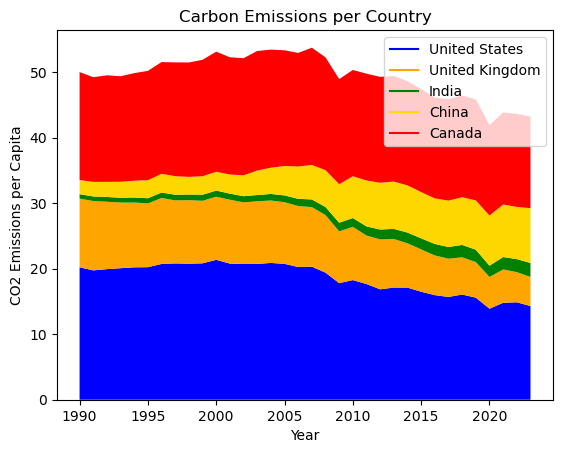

In [30]:
years = us_energy_emissions_df_after_1990["Year"]

us = us_energy_emissions_df_after_1990["emissions_total_per_capita"]
uk = uk_energy_emissions_df_after_1990["emissions_total_per_capita"]
ind = ind_energy_emissions_df_after_1990["emissions_total_per_capita"]
chn = chn_energy_emissions_df_after_1990["emissions_total_per_capita"]
can = can_energy_emissions_df_after_1990["emissions_total_per_capita"]

# Plot x-labels, y-label and data
plt.plot([], [], color ='blue', 
		label ='United States')
plt.plot([], [], color ='orange',
		label ='United Kingdom')
plt.plot([], [], color ='green',
		label ='India')
plt.plot([], [], color ='gold',
		label ='China')
plt.plot([], [], color ='red',
		label ='Canada')

# Implementing stackplot on data
plt.stackplot(years, us, uk, 
			ind, chn, can, baseline ='zero', 
			colors =['blue', 'orange', 
					'green', 'gold', 'red'])

plt.legend(loc = "upper right")

plt.title('Carbon Emissions per Country')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')

plt.show()


# more important to know the relationship between the sizes, not really important to include the y-axis in this case
# normalized area chart

In [31]:
world_energy_emissions_df_after_1990 = energy_emissions_df_after_1990[energy_emissions_df_after_1990["Entity"] == "World"]

In [32]:
data_emissions_6 = pd.DataFrame({'us_emissions':list(us_energy_emissions_df_after_1990["emissions_total_per_capita"]), 
                                 'uk_emissions':list(uk_energy_emissions_df_after_1990["emissions_total_per_capita"]), 
                                 'ind_emissions':list(ind_energy_emissions_df_after_1990["emissions_total_per_capita"]), 
                                'chn_emissions':list(chn_energy_emissions_df_after_1990["emissions_total_per_capita"]),
                                'can_emissions':list(can_energy_emissions_df_after_1990["emissions_total_per_capita"]),
                                "world_emissions":list(world_energy_emissions_df_after_1990["emissions_total_per_capita"])}, index=range(1990,2024))

data_perc = data_emissions_6.div(data_emissions_6.sum(axis=1), axis=0)

data_perc.head()

,us_emissions,uk_emissions,ind_emissions,chn_emissions,can_emissions,world_emissions
1990,0.372392,0.193329,0.012312,0.039688,0.303675,0.078603
1991,0.368965,0.197901,0.013012,0.041604,0.298544,0.079974
1992,0.371811,0.191931,0.013541,0.043005,0.303384,0.076328
1993,0.375703,0.187457,0.013745,0.045664,0.301275,0.076157
1994,0.374880,0.183602,0.014076,0.047628,0.304653,0.075161


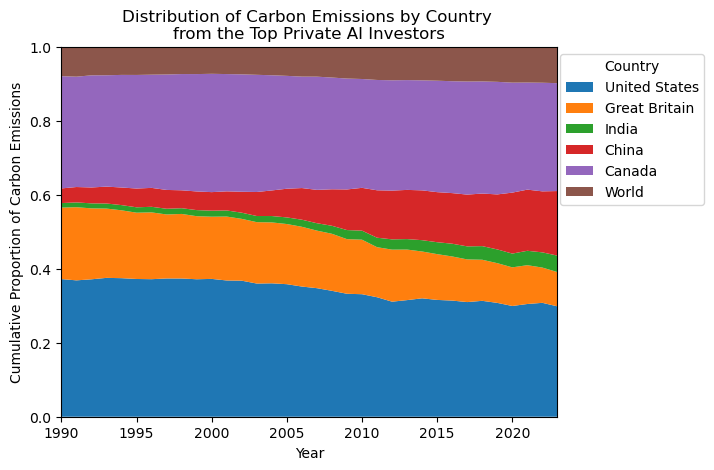

In [33]:
plt.stackplot(range(1990,2024),  
              data_perc["us_emissions"],  
              data_perc["uk_emissions"],  
              data_perc["ind_emissions"], 
              data_perc["chn_emissions"], 
              data_perc["can_emissions"],
              data_perc["world_emissions"],
              labels=['United States','Great Britain','India', "China", "Canada", "World"])
plt.legend(title = "Country", loc='upper right', bbox_to_anchor=(1.31, 1))
plt.margins(0,0)
plt.title('Distribution of Carbon Emissions by Country \nfrom the Top Private AI Investors')
plt.xlabel("Year")
plt.ylabel("Cumulative Proportion of Carbon Emissions")

# plt.savefig("Carbon_Emissions_top_5.png",
#            bbox_inches = "tight",
#            pad_inches = 1)
plt.show()

In [34]:
energy_consumption_per_capita = pd.read_csv("https://ourworldindata.org/grapher/per-capita-energy-source-stacked.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
energy_consumption_per_capita.dropna(subset = ["Code"], inplace = True)

In [35]:
energy_consumption_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5669 entries, 59 to 6314
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Entity                                  5669 non-null   object 
 1   Code                                    5669 non-null   object 
 2   Year                                    5669 non-null   int64  
 3   fossil_fuels_per_capita__kwh            3710 non-null   float64
 4   nuclear_per_capita__kwh__equivalent     5669 non-null   float64
 5   renewables_per_capita__kwh__equivalent  4242 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 310.0+ KB


In [36]:
# Total unique countries in the energy breakdown dataset
energy_consumption_per_capita["Entity"].unique()

array(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Bolivia', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Chad',
       'Chile', 'China', 'Colombia', 'Congo', 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Ecuador', 'Egypt', 'Equatorial Guinea', 'Estonia',
       'Finland', 'France', 'Gabon', 'Germany', 'Greece', 'Guyana',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Kuwait', 'Latvia', 'Libya', 'Lithuania', 'Luxembourg',
       'Madagascar', 'Malaysia', 'Mexico', 'Mongolia', 'Morocco',
       'Mozambique', 'Myanmar', 'Netherlands', 'Netherlands Antilles',
       'New Caledonia', 'New Zealand', 'Nigeria', 'North Macedonia',
       'Norway', 'Oman', 'Pakistan', 'Papua New Guinea', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar'

In [37]:
len(energy_consumption_per_capita["Entity"].unique())

110

In [38]:
energy_consumption_per_capita["total_per_capita__kwh"] = energy_consumption_per_capita["fossil_fuels_per_capita__kwh"] + energy_consumption_per_capita["nuclear_per_capita__kwh__equivalent"] + energy_consumption_per_capita["renewables_per_capita__kwh__equivalent"]

In [39]:
energy_consumption_per_capita.head()

,Entity,Code,Year,fossil_fuels_per_capita__kwh,nuclear_per_capita__kwh__equivalent,renewables_per_capita__kwh__equivalent,total_per_capita__kwh
59,Algeria,DZA,1965,1910.1324,0.0,95.53111,2005.66351
60,Algeria,DZA,1966,2281.9224,0.0,83.22350,2365.14590
61,Algeria,DZA,1967,2096.2073,0.0,94.00280,2190.21010
62,Algeria,DZA,1968,2174.2285,0.0,126.20633,2300.43483
63,Algeria,DZA,1969,2406.9130,0.0,79.12470,2486.03770


In [40]:
energy_consumption_per_capita_2023 = energy_consumption_per_capita[energy_consumption_per_capita["Year"] == 2023]
energy_consumption_per_capita_2023.dropna(inplace = True)
energy_consumption_per_capita_2023.sort_values(["renewables_per_capita__kwh__equivalent"], ascending = False, inplace = True)


energy_consumption_per_capita_2023.head(10)

C:\Users\eliss\AppData\Local\Temp\ipykernel_20532\2882825455.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\eliss\AppData\Local\Temp\ipykernel_20532\2882825455.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Entity,Code,Year,fossil_fuels_per_capita__kwh,nuclear_per_capita__kwh__equivalent,renewables_per_capita__kwh__equivalent,total_per_capita__kwh
3933,Norway,NOR,2023,28196.826,0.00000,72834.836,101031.66200
5209,Sweden,SWE,2023,14585.001,11376.64500,30342.297,56303.94300
961,Canada,CAN,2023,64956.050,5721.62940,29238.720,99916.39940
1891,Finland,FIN,2023,22978.654,15393.41500,21524.630,59896.69900
3729,New Zealand,NZL,2023,26407.250,0.00000,19333.018,45740.26800
412,Austria,AUT,2023,25737.123,0.00000,17215.490,42952.61300
1504,Denmark,DNK,2023,18942.352,0.00000,14135.978,33078.33000
5285,Switzerland,CHE,2023,15448.007,6612.13770,13708.428,35768.57270
3632,Netherlands,NLD,2023,43976.910,563.66156,9637.402,54177.97356
353,Australia,AUS,2023,53779.406,0.00000,9477.472,63256.87800


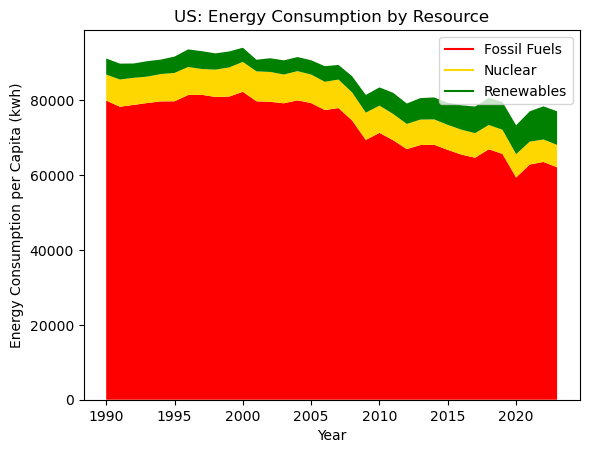

In [41]:
us_energy_consumption_per_capita = energy_consumption_per_capita[energy_consumption_per_capita["Code"] == "USA"]
us_energy_consumption_per_capita_1990 = us_energy_consumption_per_capita[us_energy_consumption_per_capita["Year"] >= 1990]

# Plot x-labels, y-label and data
plt.plot([], [], color ='red', 
		label ='Fossil Fuels')
plt.plot([], [], color ='gold',
		label ='Nuclear')
plt.plot([], [], color ='green',
		label ='Renewables')

# Implementing stackplot on data
plt.stackplot(us_energy_consumption_per_capita_1990["Year"], 
              us_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
              us_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
              us_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
              baseline ='zero', 
              colors =['red', 'gold', 'green'])

plt.legend(loc = "upper right")

plt.title('US: Energy Consumption by Resource')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita (kwh)')

plt.show()

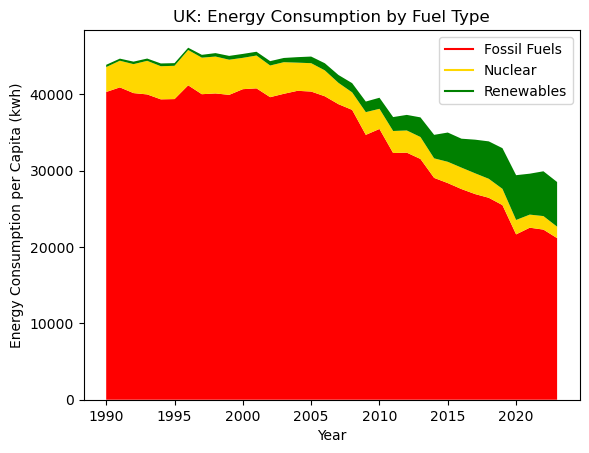

In [42]:
uk_energy_consumption_per_capita = energy_consumption_per_capita[energy_consumption_per_capita["Code"] == "GBR"]
uk_energy_consumption_per_capita_1990 = uk_energy_consumption_per_capita[uk_energy_consumption_per_capita["Year"] >= 1990]

# Plot x-labels, y-label and data
plt.plot([], [], color ='red', 
		label ='Fossil Fuels')
plt.plot([], [], color ='gold',
		label ='Nuclear')
plt.plot([], [], color ='green',
		label ='Renewables')

# Implementing stackplot on data
plt.stackplot(uk_energy_consumption_per_capita_1990["Year"], 
              uk_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
              uk_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
              uk_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
              baseline ='zero', 
              colors =['red', 'gold', 'green'])

plt.legend(loc = "upper right")

plt.title('UK: Energy Consumption by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita (kwh)')

plt.show()

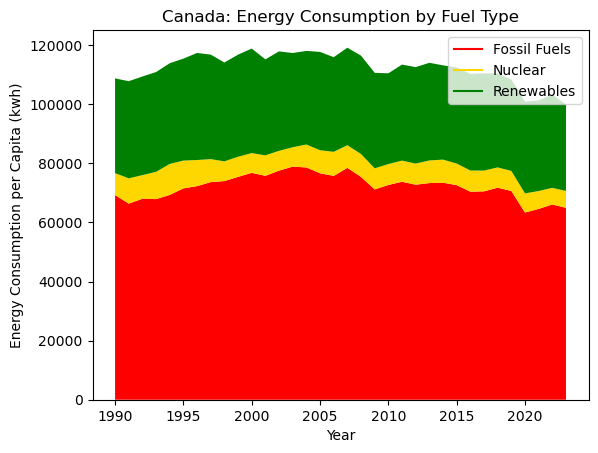

In [43]:
can_energy_consumption_per_capita = energy_consumption_per_capita[energy_consumption_per_capita["Code"] == "CAN"]
can_energy_consumption_per_capita_1990 = can_energy_consumption_per_capita[can_energy_consumption_per_capita["Year"] >= 1990]

# Plot x-labels, y-label and data
plt.plot([], [], color ='red', 
		label ='Fossil Fuels')
plt.plot([], [], color ='gold',
		label ='Nuclear')
plt.plot([], [], color ='green',
		label ='Renewables')

# Implementing stackplot on data
plt.stackplot(can_energy_consumption_per_capita_1990["Year"], 
              can_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
              can_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
              can_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
              baseline ='zero', 
              colors =['red', 'gold', 'green'])

plt.legend(loc = "upper right")

plt.title('Canada: Energy Consumption by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita (kwh)')

plt.show()

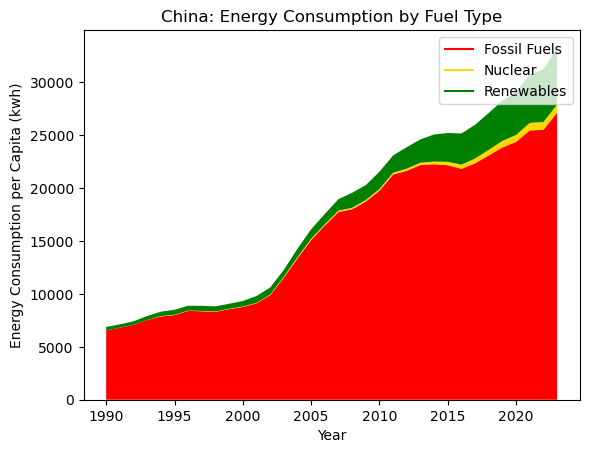

In [44]:
chn_energy_consumption_per_capita = energy_consumption_per_capita[energy_consumption_per_capita["Code"] == "CHN"]
chn_energy_consumption_per_capita_1990 = chn_energy_consumption_per_capita[chn_energy_consumption_per_capita["Year"] >= 1990]

# Plot x-labels, y-label and data
plt.plot([], [], color ='red', 
		label ='Fossil Fuels')
plt.plot([], [], color ='gold',
		label ='Nuclear')
plt.plot([], [], color ='green',
		label ='Renewables')

# Implementing stackplot on data
plt.stackplot(chn_energy_consumption_per_capita_1990["Year"], 
              chn_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
              chn_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
              chn_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
              baseline ='zero', 
              colors =['red', 'gold', 'green'])

plt.legend(loc = "upper right")

plt.title('China: Energy Consumption by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita (kwh)')

plt.show()

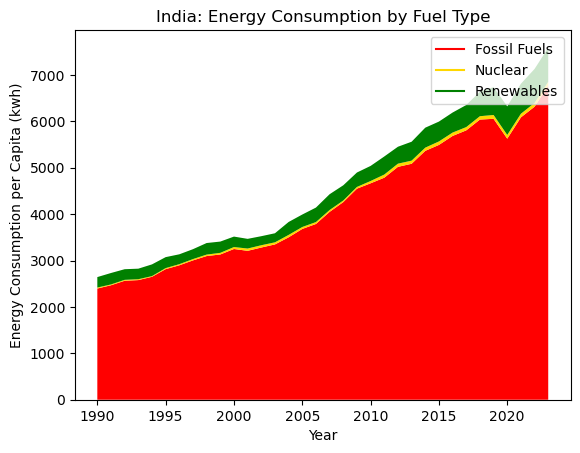

In [45]:
ind_energy_consumption_per_capita = energy_consumption_per_capita[energy_consumption_per_capita["Code"] == "IND"]
ind_energy_consumption_per_capita_1990 = ind_energy_consumption_per_capita[ind_energy_consumption_per_capita["Year"] >= 1990]

# Plot x-labels, y-label and data
plt.plot([], [], color ='red', 
		label ='Fossil Fuels')
plt.plot([], [], color ='gold',
		label ='Nuclear')
plt.plot([], [], color ='green',
		label ='Renewables')

# Implementing stackplot on data
plt.stackplot(ind_energy_consumption_per_capita_1990["Year"], 
              ind_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
              ind_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
              ind_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
              baseline ='zero', 
              colors =['red', 'gold', 'green'])

plt.legend(loc = "upper right")

plt.title('India: Energy Consumption by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Energy Consumption per Capita (kwh)')

plt.show()

In [46]:
world_energy_consumption_per_capita = energy_consumption_per_capita[energy_consumption_per_capita["Entity"] == "World"]
world_energy_consumption_per_capita_1990 = world_energy_consumption_per_capita[world_energy_consumption_per_capita["Year"] >= 1990]

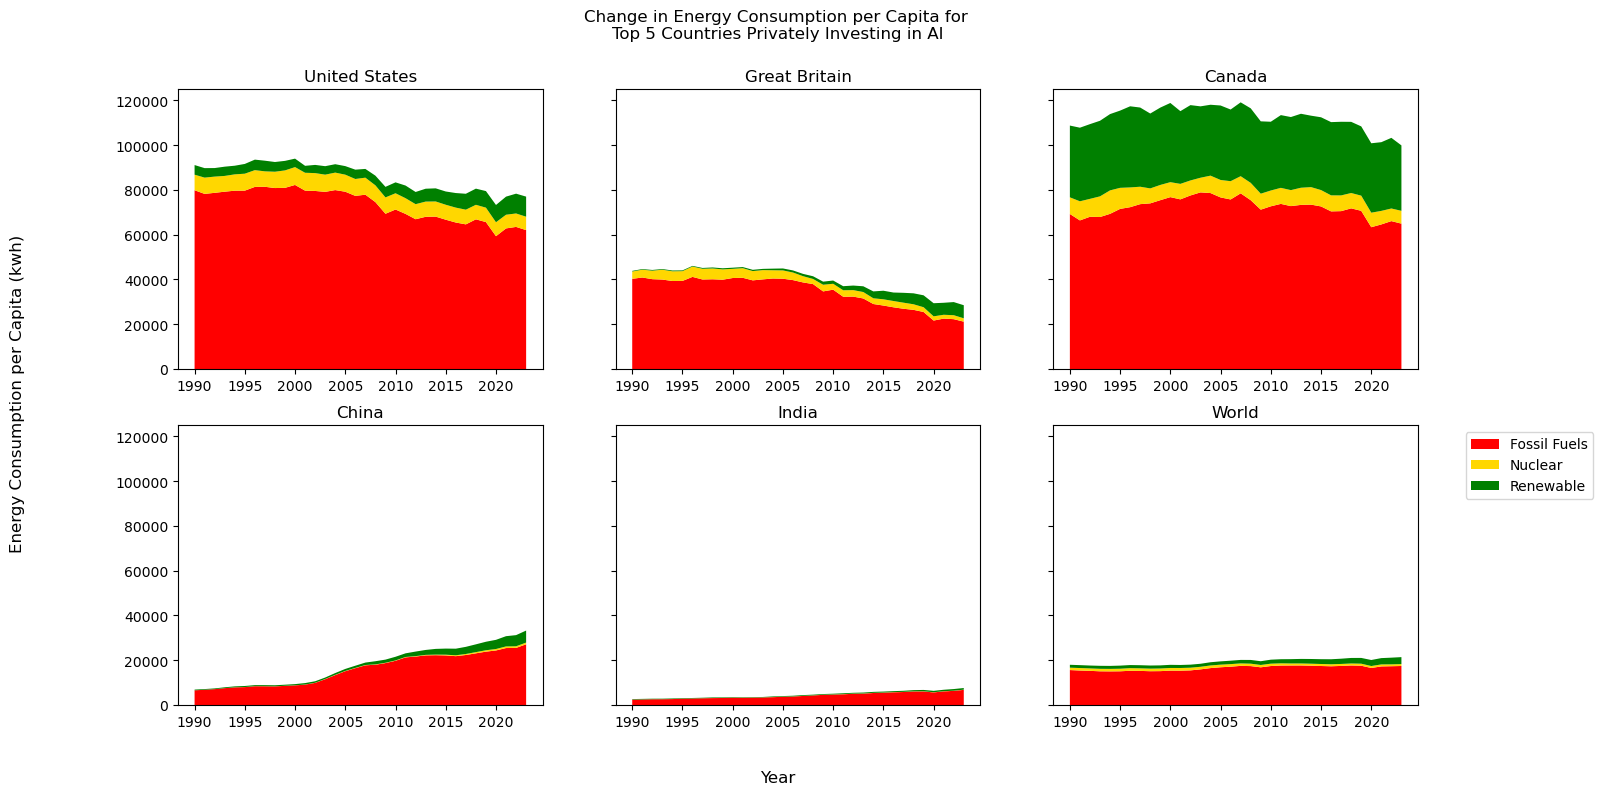

In [47]:
f, ax = plt.subplots(2, 3, figsize = (16, 8), sharey = True)

# USA Plot
ax[0,0].stackplot(us_energy_consumption_per_capita_1990["Year"], 
                  us_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
                  us_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
                  us_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
                  baseline ='zero', 
                  colors =['red', 'gold', 'green'], 
                  labels = ["Fossil Fuels", "Nuclear", "Renewable"])
ax[0,0].set_title("United States")

ax[0,1].stackplot(uk_energy_consumption_per_capita_1990["Year"], 
                  uk_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
                  uk_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
                  uk_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
                  baseline ='zero', 
                  colors =['red', 'gold', 'green'],
                 labels = ["Fossil Fuels", "Nuclear", "Renewable"])
ax[0,1].set_title("Great Britain")

ax[0,2].stackplot(can_energy_consumption_per_capita_1990["Year"], 
                  can_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
                  can_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
                  can_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
                  baseline ='zero', 
                  colors =['red', 'gold', 'green'],
                  labels = ["Fossil Fuels", "Nuclear", "Renewable"])
ax[0,2].set_title("Canada")

ax[1,0].stackplot(chn_energy_consumption_per_capita_1990["Year"], 
                  chn_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
                  chn_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
                  chn_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
                  baseline ='zero', 
                  colors =['red', 'gold', 'green'],
                  labels = ["Fossil Fuels", "Nuclear", "Renewable"])
ax[1,0].set_title("China")

ax[1,1].stackplot(ind_energy_consumption_per_capita_1990["Year"], 
                  ind_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
                  ind_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
                  ind_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
                  baseline ='zero', 
                  colors =['red', 'gold', 'green'], 
                  labels = ["Fossil Fuels", "Nuclear", "Renewable"])
ax[1,1].set_title("India")

ax[1,2].stackplot(world_energy_consumption_per_capita_1990["Year"], 
                  world_energy_consumption_per_capita_1990["fossil_fuels_per_capita__kwh"], 
                  world_energy_consumption_per_capita_1990["nuclear_per_capita__kwh__equivalent"], 
                  world_energy_consumption_per_capita_1990["renewables_per_capita__kwh__equivalent"],
                  baseline ='zero', 
                  colors =['red', 'gold', 'green'], 
                  labels = ["Fossil Fuels", "Nuclear", "Renewable"])
ax[1,2].set_title("World")

f.suptitle("Change in Energy Consumption per Capita for \nTop 5 Countries Privately Investing in AI")
f.supxlabel("Year")
f.supylabel("Energy Consumption per Capita (kwh)")
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

# plt.savefig("Energy_Consumption.png",
#            bbox_inches = "tight",
#            pad_inches = 1)

In [48]:
global_emissions = energy_emissions_df[energy_emissions_df["Entity"] == "World"]
global_emissions_1990 = global_emissions[global_emissions["Year"] >= 1990]
global_emissions_1990.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region
59283,World,OWID_WRL,1990,4.266109,17972.460,5.327803e+09,NaN
59284,World,OWID_WRL,1991,4.278877,17814.373,5.418736e+09,NaN
59285,World,OWID_WRL,1992,4.091575,17637.264,5.505990e+09,NaN
59286,World,OWID_WRL,1993,4.069678,17508.812,5.591545e+09,NaN
59287,World,OWID_WRL,1994,4.051227,17470.807,5.675551e+09,NaN


Text(0.5, 0.98, 'Global: Energy Consumption and Carbon Emission per Capita')

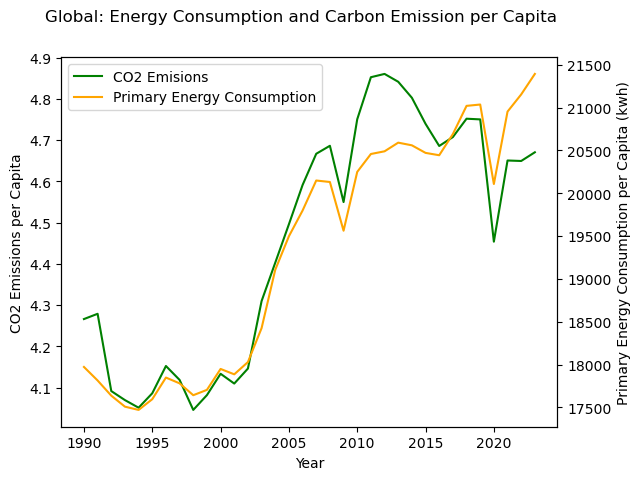

In [49]:
f, ax1 = plt.subplots()
ax2 = ax1.twinx()

p1 = ax1.plot(global_emissions_1990["Year"], global_emissions_1990["emissions_total_per_capita"], color = "green", label = "CO2 Emisions")
ax1.set_ylabel("CO2 Emissions per Capita")
ax1.set_xlabel("Year")

p2 = ax2.plot(global_emissions_1990["Year"], global_emissions_1990["primary_energy_consumption_per_capita__kwh"], color = "orange", label = "Primary Energy Consumption")
ax2.set_ylabel("Primary Energy Consumption per Capita (kwh)")

plots = p1 + p2
labs = [l.get_label() for l in plots]
ax1.legend(plots, labs, loc = 0)

f.suptitle("Global: Energy Consumption and Carbon Emission per Capita")

# plt.savefig("global_energy_carbon.png",
#             bbox_inches = "tight",
#             pad_inches = 1)

In [50]:
total_investment = ai_private_investment_original[ai_private_investment_original["Entity"] == "World"]
total_investment.head()

,Entity,Code,Year,investment_estimated__field_all
808,World,OWID_WRL,2013,9453119127
809,World,OWID_WRL,2014,23192018094
810,World,OWID_WRL,2015,28302303677
811,World,OWID_WRL,2016,39155092633
812,World,OWID_WRL,2017,43800513060


In [51]:
global_temp = pd.read_csv('flat-ui__data.csv')
global_temp.rename(columns = {"Year" : "year_month"}, inplace = True)
# create date column for datetime
global_temp["date"] = pd.to_datetime(global_temp["year_month"])
# add back a year column
global_temp["year"] = global_temp["date"].dt.year

In [52]:
# just want to visualize the data per year, so group the values by year and then calculate the average temperature change
global_temp_1990 = global_temp[global_temp["year"] >= 1990]
global_temp_yearly_1990 = global_temp_1990[["year", "Mean"]].groupby("year").mean("Mean")

In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=global_temp_yearly_1990.index, y=global_temp_yearly_1990["Mean"], name="Global Temperature Change"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=global_emissions_1990["Year"], y=global_emissions_1990["emissions_total_per_capita"], name="Global Carbon Emissions"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Global Increase in Carbon Emissions and Rise in Temperatures",
    width=1000,
    height=600
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Temperature Change (in Celsius)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Carbon Emissions per Capita (tonnes)</b>", secondary_y=True)

fig.show()

In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=global_temp_yearly_1990.index, y=global_temp_yearly_1990["Mean"], name="Global Temperature Change"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=total_investment["Year"], y=total_investment["investment_estimated__field_all"], name="Private Investment into AI"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Increase in AI Private Investment and Rise in Temperatures",
    width=1000,
    height=600
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Temperature Change (in Celsius)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>AI Investment (in dollars)</b>", secondary_y=True)

fig.show()

## Global Temperatures and Natural Disasters Over Time

In [56]:
disaster = pd.read_excel('EMDAT_WEATHER_DATASET.xlsx')

In [57]:
#create diff subgroups based on variables
disaster_grouped_country = disaster.groupby(['Country'])['Disaster Count'].sum().reset_index().sort_values(by='Disaster Count', ascending=False).head(10)
disaster_grouped_year = disaster.groupby(['Start Year'])['Disaster Count'].sum().reset_index()
disaster_total_type = disaster.groupby('Disaster Type')['Disaster Count'].sum().reset_index().sort_values(by='Disaster Count', ascending=False).head(7)
disaster_total_type = disaster_total_type.sort_values(by='Disaster Count', ascending=True)
disaster_grouped_country = disaster_grouped_country.sort_values(by='Disaster Count', ascending=True)

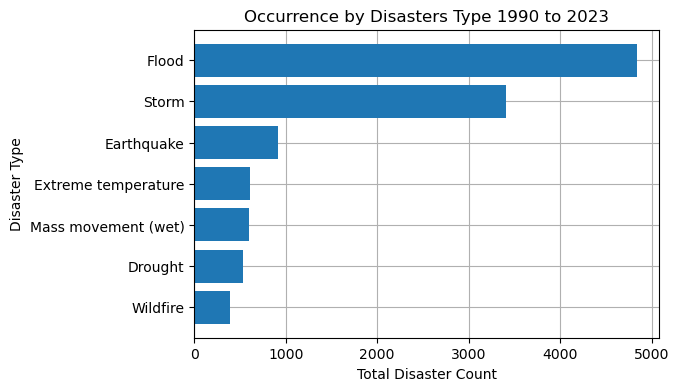

In [58]:
plt.figure(figsize=(6, 4))
plt.barh(disaster_total_type['Disaster Type'], disaster_total_type['Disaster Count'], zorder=2)
plt.title('Occurrence by Disasters Type 1990 to 2023')
plt.xlabel('Total Disaster Count')
plt.ylabel('Disaster Type')
plt.grid(TRUE)

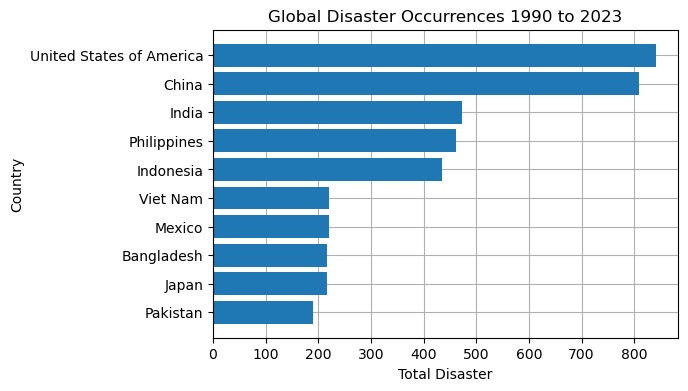

In [59]:
plt.figure(figsize=(6, 4))
plt.barh(disaster_grouped_country['Country'], disaster_grouped_country['Disaster Count'], zorder=2)
plt.title('Global Disaster Occurrences 1990 to 2023')
plt.xlabel('Total Disaster')
plt.ylabel('Country')
plt.grid(TRUE)

<BarContainer object of 175 artists>

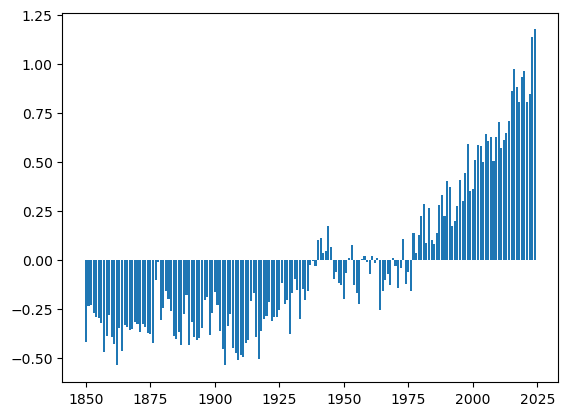

In [60]:
# just want to visualize the data per year, so group the values by year and then calculate the average temperature change
global_temp_yearly = global_temp[["year", "Mean"]].groupby("year").mean("Mean")
# bar plot with the temperature changes
plt.bar(global_temp_yearly.index, global_temp_yearly["Mean"])

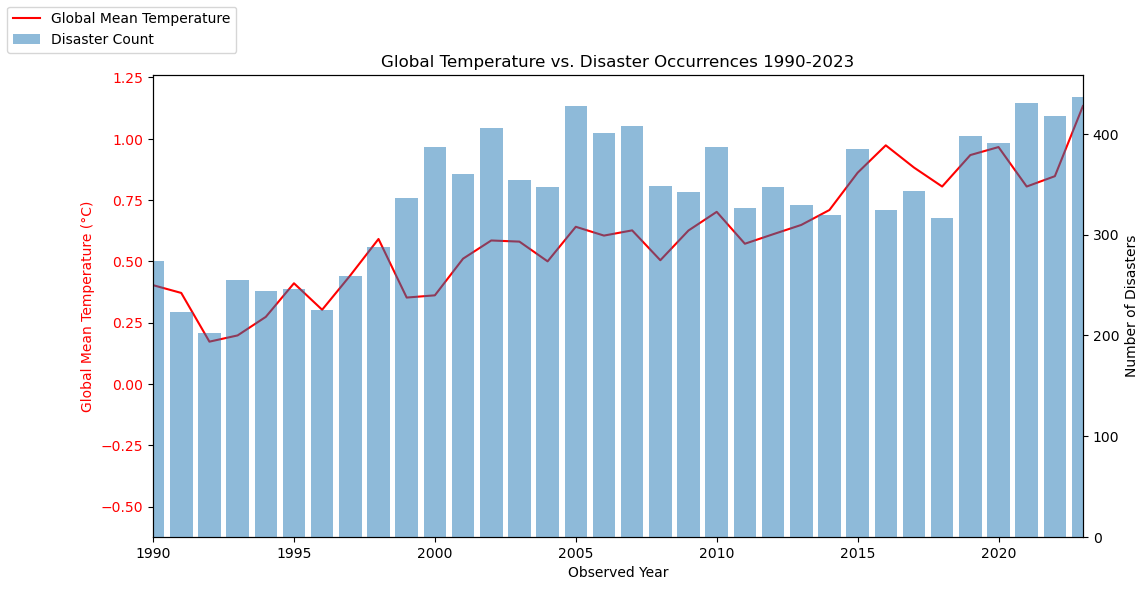

In [61]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot global temperature as a line graph
ax1.plot(global_temp_yearly.index, global_temp_yearly["Mean"], color='red', label='Global Mean Temperature')
ax1.set_xlabel('Observed Year')
ax1.set_ylabel('Global Mean Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_xlim(1990, 2023)

# Plot disaster count as a bar graph
ax2 = ax1.twinx()
ax2.bar(disaster_grouped_year['Start Year'], disaster_grouped_year['Disaster Count'], alpha=0.5, label='Disaster Count')
ax2.set_ylabel('Number of Disasters')
ax2.tick_params(axis='y')

# Add title and legend
plt.title('Global Temperature vs. Disaster Occurrences 1990-2023')
fig.legend(loc="upper left")
plt.show()

## Correlation Among All Variables (Globally)

In [63]:
world_investment_energy_df = investment_energy_df[investment_energy_df["Entity"] == "World"]

In [64]:
global_temp.head()

,Source,year_month,Mean,date,year
0,gcag,1850-01,-0.6746,1850-01-01,1850
1,gcag,1850-02,-0.3334,1850-02-01,1850
2,gcag,1850-03,-0.5913,1850-03-01,1850
3,gcag,1850-04,-0.5887,1850-04-01,1850
4,gcag,1850-05,-0.5088,1850-05-01,1850


In [65]:
world_investment_energy_temp_df = pd.merge(world_investment_energy_df, global_temp_yearly, how = "left", left_on = ["Year"], right_on = global_temp_yearly.index)
world_investment_energy_temp_df.drop(columns = ["Continent"], inplace = True)
final_world = pd.merge(world_investment_energy_temp_df, disaster_grouped_year, how = "left", left_on = ["Year"], right_on = ["Start Year"])
final_world.drop(columns = ["Entity", "Code", "Start Year"], inplace = True)
final_world.rename(columns = {"investment_estimated__field_all" : "AI Private Investment", 
                              "emissions_total_per_capita" : "Carbon Emissions per Capita (tonnes)",
                              "primary_energy_consumption_per_capita__kwh" : "Energy Consumption per Capita (kwh)",
                              "population_historical" : "Population",
                              "Mean" : "Temperature Change"}, inplace = True)
final_world

,Year,AI Private Investment,Carbon Emissions per Capita (tonnes),Energy Consumption per Capita (kwh),Population,Temperature Change,Disaster Count
0,2013,9453119127,4.841286,20591.310,7.291794e+09,0.648450,329
1,2014,23192018094,4.802484,20560.121,7.381616e+09,0.709358,320
2,2015,28302303677,4.739299,20471.756,7.470492e+09,0.861308,385
3,2016,39155092633,4.685639,20444.303,7.558555e+09,0.973129,324
4,2017,43800513060,4.707258,20691.545,7.645618e+09,0.882587,343
5,2018,81694457251,4.751732,21020.674,7.729903e+09,0.805079,317
6,2019,128380713983,4.750081,21036.396,7.811294e+09,0.933450,398
7,2020,155532845145,4.453724,20108.234,7.887001e+09,0.966046,391
8,2021,236893000000,4.650446,20953.705,7.954448e+09,0.805117,431
9,2022,147440630389,4.649288,21154.355,8.021407e+09,0.847325,418


In [66]:
matrix = final_world.corr()
matrix

,Year,AI Private Investment,Carbon Emissions per Capita (tonnes),Energy Consumption per Capita (kwh),Population,Temperature Change,Disaster Count
Year,1.000000,0.838793,-0.637062,0.600862,0.998473,0.644339,0.813937
AI Private Investment,0.838793,1.000000,-0.631081,0.367330,0.845768,0.307730,0.774422
Carbon Emissions per Capita (tonnes),-0.637062,-0.631081,1.000000,0.228689,-0.651195,-0.564412,-0.500770
Energy Consumption per Capita (kwh),0.600862,0.367330,0.228689,1.000000,0.584271,0.244423,0.468186
Population,0.998473,0.845768,-0.651195,0.584271,1.000000,0.649999,0.800149
Temperature Change,0.644339,0.307730,-0.564412,0.244423,0.649999,1.000000,0.511568
Disaster Count,0.813937,0.774422,-0.500770,0.468186,0.800149,0.511568,1.000000


<Axes: >

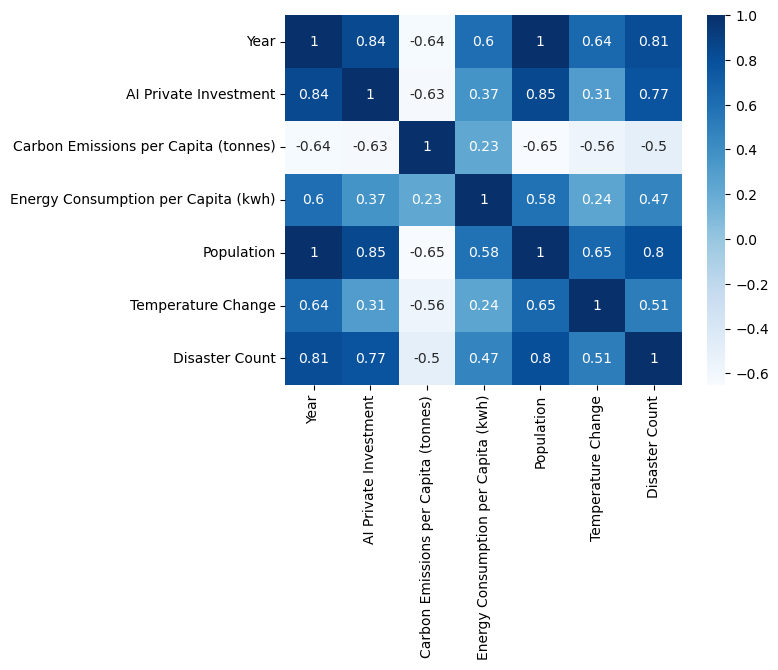

In [67]:
# plotting correlation matrix
sns.heatmap(matrix, cmap="Blues", annot=True)

In [68]:
world_investment = ai_private_investment[ai_private_investment["Entity"] == "World"]
world_investment.drop(columns = ["Entity", "Code"], inplace = True)
world_investment

C:\Users\eliss\AppData\Local\Temp\ipykernel_20532\1640440992.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,investment_estimated__field_all
808,2013,9453119127
809,2014,23192018094
810,2015,28302303677
811,2016,39155092633
812,2017,43800513060
813,2018,81694457251
814,2019,128380713983
815,2020,155532845145
816,2021,236893000000
817,2022,147440630389


In [69]:
new_rows = pd.DataFrame({"Year": range(2000, 2013), "investment_estimated__field_all": [0] * 13})
world_investment_new = pd.concat([world_investment, new_rows], ignore_index=True)
world_investment_new.sort_values(["Year"], inplace = True)

In [70]:
energy_emissions_df_with_regions_world = energy_emissions_df_with_regions[energy_emissions_df_with_regions["Entity"] == "World"]

investment_energy_df_1 = pd.merge(world_investment_new, energy_emissions_df_with_regions_world, how = "left", right_on = ["Year"], left_on = ["Year"])
world_investment_energy_temp_df = pd.merge(investment_energy_df_1, global_temp_yearly, how = "left", left_on = ["Year"], right_on = global_temp_yearly.index)
final_world = pd.merge(world_investment_energy_temp_df, disaster_grouped_year, how = "left", left_on = ["Year"], right_on = ["Start Year"])
final_world.drop(columns = ["Entity", "Code", "Continent", "Start Year"], inplace = True)
final_world.rename(columns = {"investment_estimated__field_all" : "AI Private Investment", 
                              "emissions_total_per_capita" : "Carbon Emissions per Capita (tonnes)",
                              "primary_energy_consumption_per_capita__kwh" : "Energy Consumption per Capita (kwh)",
                              "population_historical" : "Population",
                              "Mean" : "Temperature Change"}, inplace = True)
final_world

,Year,AI Private Investment,Carbon Emissions per Capita (tonnes),Energy Consumption per Capita (kwh),Population,Temperature Change,Disaster Count
0,2000,0,4.133470,17949.238,6.171703e+09,0.361375,387
1,2001,0,4.109761,17886.389,6.254936e+09,0.510892,360
2,2002,0,4.146101,18029.490,6.337730e+09,0.585062,406
3,2003,0,4.309647,18425.412,6.420362e+09,0.580417,354
4,2004,0,4.402713,19106.504,6.503378e+09,0.499942,347
5,2005,0,4.495905,19498.543,6.586970e+09,0.640929,428
6,2006,0,4.590964,19798.291,6.671452e+09,0.605033,401
7,2007,0,4.666746,20149.217,6.757309e+09,0.626258,408
8,2008,0,4.686156,20131.947,6.844458e+09,0.504500,348
9,2009,0,4.549688,19563.130,6.932766e+09,0.625892,342


Text(0.5, 1.0, 'Correlation Matrix')

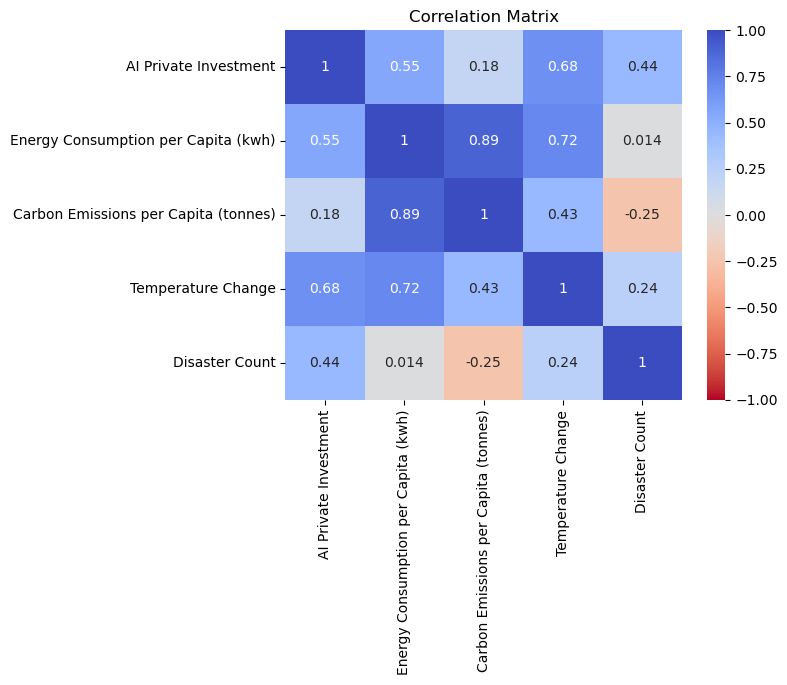

In [71]:
# plotting correlation matrix
matrix = final_world[["AI Private Investment", "Energy Consumption per Capita (kwh)", "Carbon Emissions per Capita (tonnes)", "Temperature Change",	"Disaster Count"]].corr()
sns.heatmap(matrix, cmap = "coolwarm_r", vmin = -1, vmax = 1, annot=True)
plt.title("Correlation Matrix")

# plt.savefig("matrix.png",
#             bbox_inches = "tight",
#             pad_inches = 1)